In [30]:
import pandas as pd

# Путь к файлу CSV
csv_file_path = r'C:\Users\abdul\Desktop\Тестовое задание\data\supermarket_data.csv'

# Загрузка данных
data = pd.read_csv(csv_file_path)

# Просмотр первых строк
print("Первые строки данных:")
print(data.head())



Первые строки данных:
   Unnamed: 0           Организация   ВремяЧека  НомерЧека  НомерКассы  \
0           0  Супермаркет "РосМаг"  2024-01-01     102935           4   
1           1  Супермаркет "РосМаг"  2024-01-01     102935           4   
2           2  Супермаркет "РосМаг"  2024-01-01     109982           3   
3           3  Супермаркет "РосМаг"  2024-01-01     109982           3   
4           4  Супермаркет "РосМаг"  2024-01-01     106511           4   

  НомерТранзакции                          Кассир  НомерАртикула  \
0         T002935  Белозеров Порфирий Гавриилович           2009   
1         T002935  Белозеров Порфирий Гавриилович           2005   
2         T009982       Кира Кузьминична Никитина           2001   
3         T009982       Кира Кузьминична Никитина           2003   
4         T006511            Громов Василий Фокич           2012   

                      Товар  Количество  Сумма (руб)  Скидка (%)  
0          Сок апельсиновый           1        98.23     

In [31]:

# Информация о колонках
print("\nИнформация о колонках:")
print(data.info())


Информация о колонках:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29791 entries, 0 to 29790
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       29791 non-null  int64  
 1   Организация      29791 non-null  object 
 2   ВремяЧека        29791 non-null  object 
 3   НомерЧека        29791 non-null  int64  
 4   НомерКассы       29791 non-null  int64  
 5   НомерТранзакции  29791 non-null  object 
 6   Кассир           29791 non-null  object 
 7   НомерАртикула    29791 non-null  int64  
 8   Товар            29791 non-null  object 
 9   Количество       29791 non-null  int64  
 10  Сумма (руб)      29791 non-null  float64
 11  Скидка (%)       29791 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 2.7+ MB
None


In [32]:
# Проверка пропусков
print("\nПропуски в данных:")
print(data.isnull().sum())





Пропуски в данных:
Unnamed: 0         0
Организация        0
ВремяЧека          0
НомерЧека          0
НомерКассы         0
НомерТранзакции    0
Кассир             0
НомерАртикула      0
Товар              0
Количество         0
Сумма (руб)        0
Скидка (%)         0
dtype: int64


In [33]:
# Описание данных
print("\nОписание числовых колонок:")
print(data.describe())


Описание числовых колонок:
         Unnamed: 0      НомерЧека    НомерКассы  НомерАртикула    Количество  \
count  29791.000000   29791.000000  29791.000000   29791.000000  29791.000000   
mean   14895.000000  104988.953409      5.516196    2010.303414      2.100366   
std     8600.065271    2881.843055      2.864853       5.841077      2.112193   
min        0.000000  100001.000000      1.000000    2001.000000      1.000000   
25%     7447.500000  102491.000000      3.000000    2005.000000      1.000000   
50%    14895.000000  104968.000000      6.000000    2010.000000      1.000000   
75%    22342.500000  107489.000000      8.000000    2015.000000      2.000000   
max    29790.000000  110000.000000     10.000000    2020.000000     23.000000   

        Сумма (руб)    Скидка (%)  
count  29791.000000  29791.000000  
mean     173.966837      3.758014  
std      179.117143      6.502889  
min       11.930000      0.000000  
25%       65.690000      0.000000  
50%      118.110000      0

In [34]:
# Удаляем колонку 'Unnamed: 0'
data = data.drop(columns=['Unnamed: 0'])

# Преобразуем колонку 'ВремяЧека' в datetime
data['sale_datetime'] = pd.to_datetime(data['ВремяЧека'], errors='coerce')

# Проверяем наличие некорректных дат
invalid_dates = data[data['sale_datetime'].isnull()]
if not invalid_dates.empty:
    print("Обнаружены некорректные даты:")
    print(invalid_dates)

# Удаляем строки с некорректными датами
data = data.dropna(subset=['sale_datetime'])

# Проверяем дубликаты
print("Количество дубликатов до очистки:", data.duplicated().sum())
data = data.drop_duplicates()
print("Количество дубликатов после очистки:", data.duplicated().sum())

# Проверяем итоговую структуру
print("\nОбновлённые данные:")
print(data.info())


Количество дубликатов до очистки: 0
Количество дубликатов после очистки: 0

Обновлённые данные:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29791 entries, 0 to 29790
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Организация      29791 non-null  object        
 1   ВремяЧека        29791 non-null  object        
 2   НомерЧека        29791 non-null  int64         
 3   НомерКассы       29791 non-null  int64         
 4   НомерТранзакции  29791 non-null  object        
 5   Кассир           29791 non-null  object        
 6   НомерАртикула    29791 non-null  int64         
 7   Товар            29791 non-null  object        
 8   Количество       29791 non-null  int64         
 9   Сумма (руб)      29791 non-null  float64       
 10  Скидка (%)       29791 non-null  int64         
 11  sale_datetime    29791 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), obje

In [35]:
# Общая выручка
total_revenue = data['Сумма (руб)'].sum()
print(f"Общая выручка: {total_revenue:.2f} руб.")

# Количество уникальных значений
unique_cashiers = data['Кассир'].nunique()
unique_products = data['Товар'].nunique()
unique_organizations = data['Организация'].nunique()

print(f"Количество кассиров: {unique_cashiers}")
print(f"Количество уникальных товаров: {unique_products}")
print(f"Количество организаций: {unique_organizations}")


Общая выручка: 5182646.03 руб.
Количество кассиров: 50
Количество уникальных товаров: 20
Количество организаций: 1


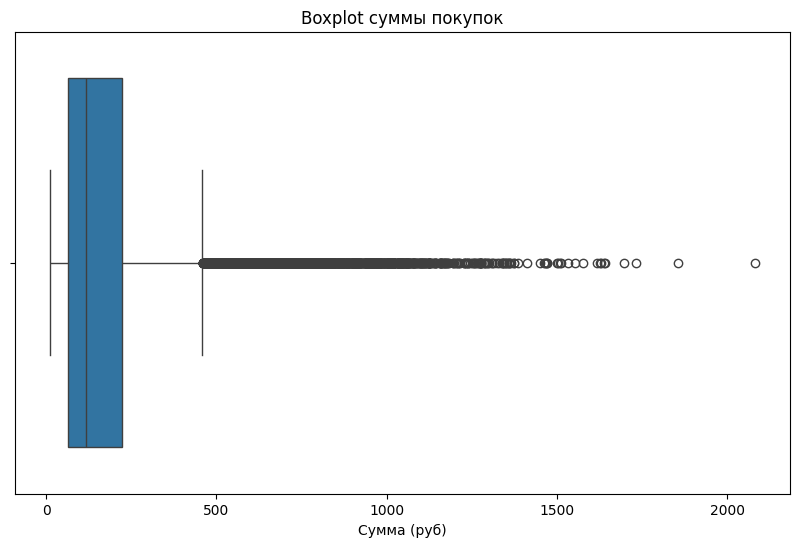

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot для выявления выбросов в сумме покупок
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Сумма (руб)')
plt.title('Boxplot суммы покупок')
plt.show()


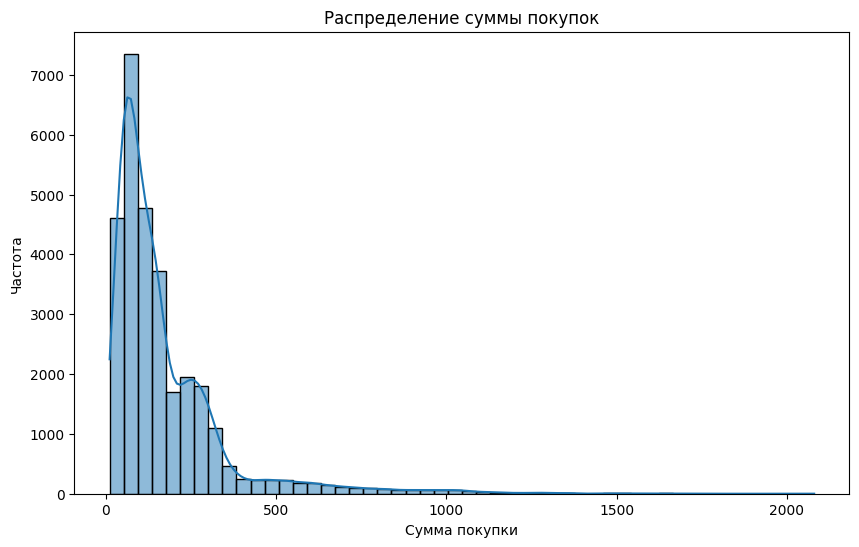

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Сумма (руб)'], bins=50, kde=True)
plt.title('Распределение суммы покупок')
plt.xlabel('Сумма покупки')
plt.ylabel('Частота')
plt.show()

In [42]:
Q1 = data['Сумма (руб)'].quantile(0.25)  # Первый квартиль
Q3 = data['Сумма (руб)'].quantile(0.75)  # Третий квартиль
IQR = Q3 - Q1  # Межквартильный размах

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Границы выбросов: {lower_bound} - {upper_bound}")

Границы выбросов: -170.53750000000002 - 459.40250000000003


In [43]:
# Данные выше верхней границы
outliers = data[data['Сумма (руб)'] > upper_bound]
print(f"Количество выбросов: {outliers.shape[0]}")

# Описание выбросов
print(outliers.describe())

Количество выбросов: 1887
           НомерЧека   НомерКассы  НомерАртикула   Количество  Сумма (руб)  \
count    1887.000000  1887.000000    1887.000000  1887.000000  1887.000000   
mean   104948.547960     5.593535    2006.447801     5.839958   724.628203   
min    100004.000000     1.000000    2004.000000     2.000000   459.690000   
25%    102424.000000     3.000000    2004.000000     2.000000   544.670000   
50%    104946.000000     6.000000    2005.000000     3.000000   656.320000   
75%    107382.000000     8.000000    2007.000000    10.000000   852.660000   
max    109999.000000    10.000000    2019.000000    23.000000  2080.260000   
std      2832.236756     2.812942       3.358613     4.972654   230.433684   

        Скидка (%)                  sale_datetime  
count  1887.000000                           1887  
mean      2.994171  2024-07-02 15:45:30.047694848  
min       0.000000            2024-01-01 00:00:00  
25%       0.000000            2024-04-01 12:00:00  
50%       0

In [48]:
# Топ товаров в чеках с выбросами
outlier_products = outliers['Товар'].value_counts()
print("Топ-10 товаров в чеках с выбросами:")
print(outlier_products.head(10))

Топ-10 товаров в чеках с выбросами:
Товар
Куриные яйца 'Простоквашино'    606
Сыр 'Российский'                512
Кофе молотый                    404
Куриное филе                    180
Творог                           75
Чай черный                       73
Картофель                        14
Сок апельсиновый                 11
Масло подсолнечное                9
Бананы                            3
Name: count, dtype: int64


In [49]:
# Топ кассиров, обслуживающих крупные покупки
outlier_cashiers = outliers['Кассир'].value_counts()
print("Топ-10 кассиров в чеках с выбросами:")
print(outlier_cashiers.head(10))

Топ-10 кассиров в чеках с выбросами:
Кассир
Евгений Елизарович Щукин         62
Герасимова Юлия Альбертовна      50
Каллистрат Георгиевич Захаров    50
Лыткин Савватий Эдгардович       49
Анастасия Матвеевна Гущина       48
Бобров Вышеслав Еремеевич        46
Нинель Робертовна Калашникова    46
Парфен Авдеевич Селезнев         44
Новиков Леон Ааронович           43
Алла Михайловна Власова          42
Name: count, dtype: int64


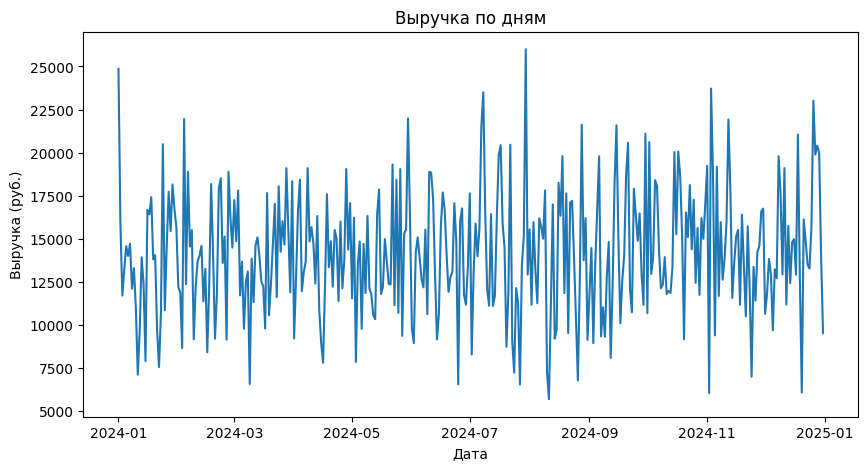

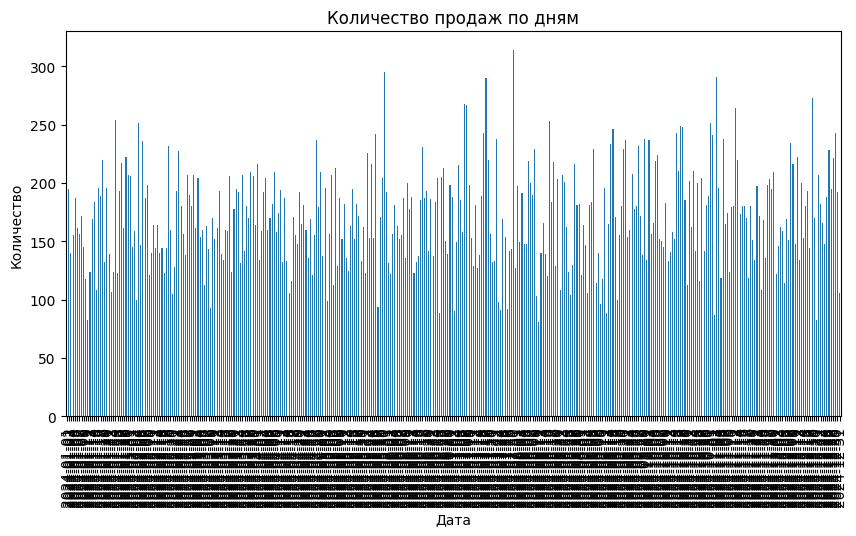

In [51]:

# Выручка по дням
revenue_by_day = data.groupby(data['sale_datetime'].dt.date)['Сумма (руб)'].sum()
revenue_by_day.plot(kind='line', title='Выручка по дням', xlabel='Дата', ylabel='Выручка (руб.)', figsize=(10, 5))
plt.show()

# Количество продаж по дням
sales_count_by_day = data.groupby(data['sale_datetime'].dt.date)['Количество'].sum()
sales_count_by_day.plot(kind='bar', title='Количество продаж по дням', xlabel='Дата', ylabel='Количество', figsize=(10, 5))
plt.show()


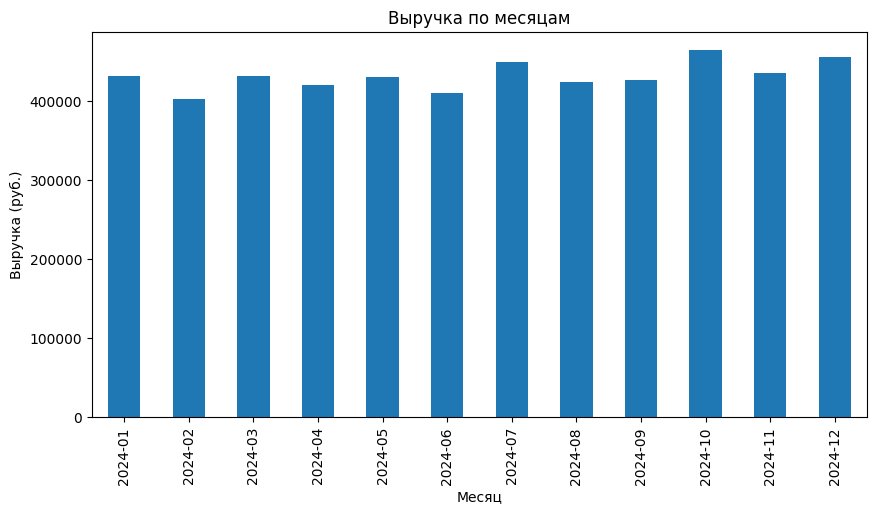

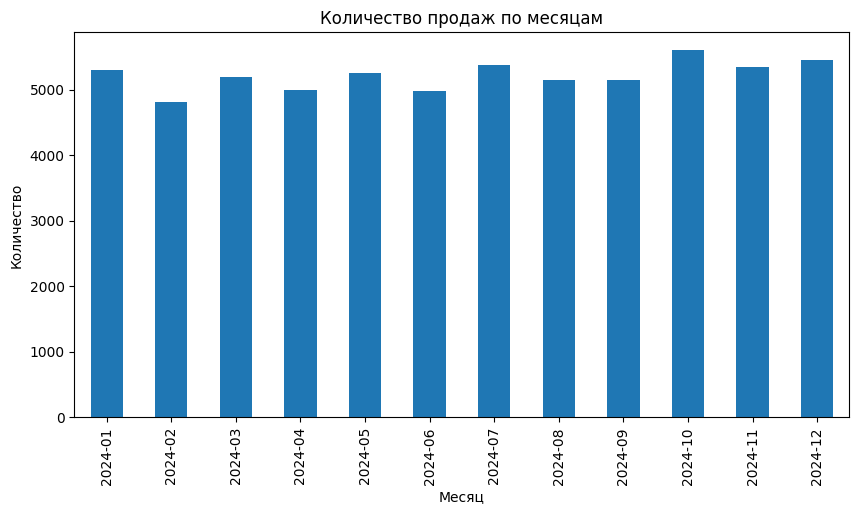

In [10]:
# Группировка выручки по месяцам
revenue_by_month = data.groupby(data['sale_datetime'].dt.to_period('M'))['Сумма (руб)'].sum()
revenue_by_month.plot(kind='bar', title='Выручка по месяцам', xlabel='Месяц', ylabel='Выручка (руб.)', figsize=(10, 5))
plt.show()

# Группировка количества продаж по месяцам
sales_count_by_month = data.groupby(data['sale_datetime'].dt.to_period('M'))['Количество'].sum()
sales_count_by_month.plot(kind='bar', title='Количество продаж по месяцам', xlabel='Месяц', ylabel='Количество', figsize=(10, 5))
plt.show()


Топ-10 товаров по количеству продаж:
Товар
Картофель                       9812
Куриные яйца 'Простоквашино'    7834
Морковь                         5901
Бананы                          4300
Лук репчатый                    4206
Яблоки 'Белый налив'            4199
Молоко 'Домик в деревне'        2792
Сок апельсиновый                2771
Чай черный                      2739
Кофе молотый                    2729
Name: Количество, dtype: int64


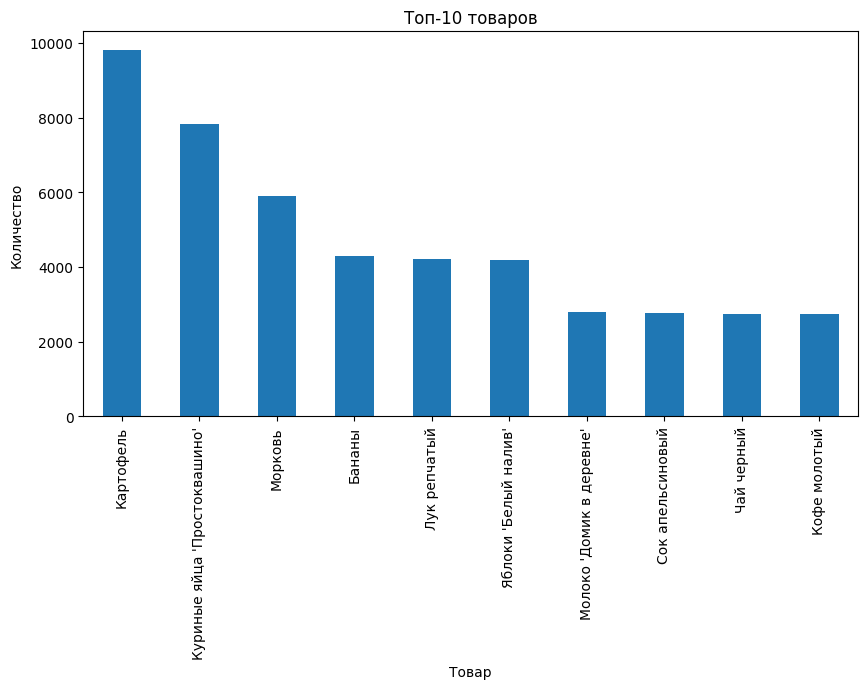


Топ-10 кассиров по выручке:
Кассир
Евгений Елизарович Щукин         123700.67
Бобров Вышеслав Еремеевич        122661.54
Анастасия Матвеевна Гущина       120976.97
Парфен Авдеевич Селезнев         120816.14
Каллистрат Георгиевич Захаров    117624.09
Нинель Робертовна Калашникова    115274.60
Герасимова Юлия Альбертовна      115178.66
Лыткин Савватий Эдгардович       111055.45
Зуев Владлен Фокич               110281.82
Андреева Агата Николаевна        110245.59
Name: Сумма (руб), dtype: float64


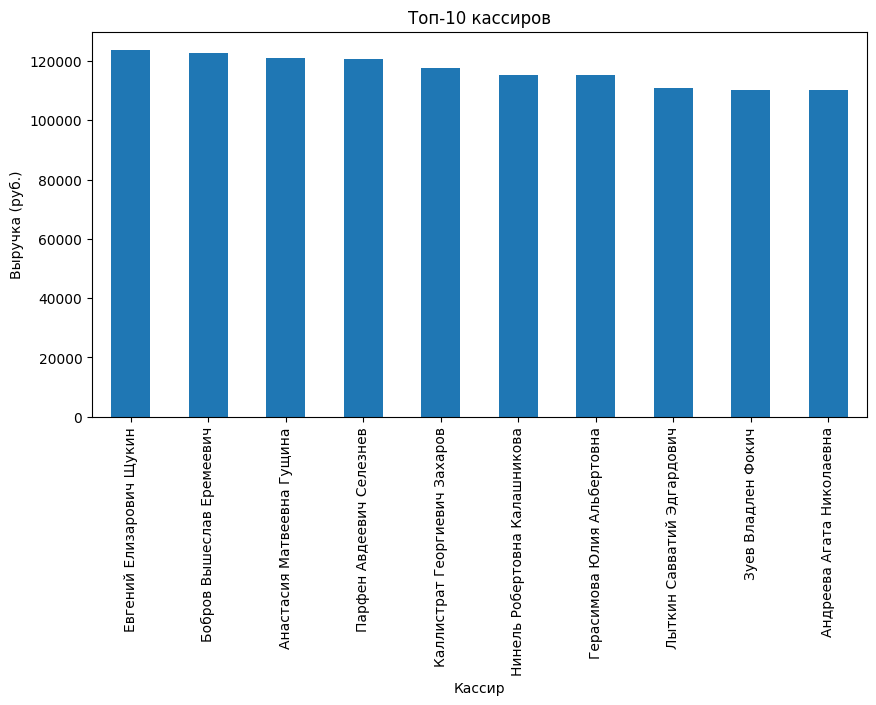

In [9]:
# Топ-10 товаров по количеству продаж
top_products = data.groupby('Товар')['Количество'].sum().sort_values(ascending=False).head(10)
print("\nТоп-10 товаров по количеству продаж:")
print(top_products)

top_products.plot(kind='bar', title='Топ-10 товаров', xlabel='Товар', ylabel='Количество', figsize=(10, 5))
plt.show()

# Топ-10 кассиров по выручке
top_cashiers = data.groupby('Кассир')['Сумма (руб)'].sum().sort_values(ascending=False).head(10)
print("\nТоп-10 кассиров по выручке:")
print(top_cashiers)

top_cashiers.plot(kind='bar', title='Топ-10 кассиров', xlabel='Кассир', ylabel='Выручка (руб.)', figsize=(10, 5))
plt.show()


In [12]:
# Продажи со скидками
discount_sales = data[data['Скидка (%)'] > 0]

# Доля выручки со скидками
discount_revenue = discount_sales['Сумма (руб)'].sum()
total_revenue = data['Сумма (руб)'].sum()
discount_share = (discount_revenue / total_revenue) * 100

print(f"Общая выручка: {total_revenue:.2f} руб.")
print(f"Выручка от продаж со скидками: {discount_revenue:.2f} руб.")
print(f"Доля выручки со скидками: {discount_share:.2f}%")


Общая выручка: 5182646.03 руб.
Выручка от продаж со скидками: 1399630.06 руб.
Доля выручки со скидками: 27.01%



Распределение выручки по величине скидки:
Скидка (%)
5     367304.25
10    360592.09
15    351406.93
20    320326.79
Name: Сумма (руб), dtype: float64


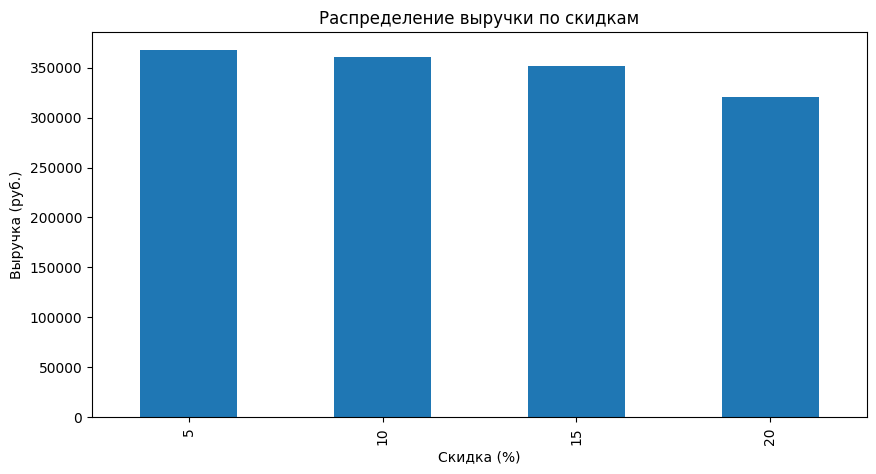

In [13]:
# Группировка по величине скидки
discount_distribution = discount_sales.groupby('Скидка (%)')['Сумма (руб)'].sum().sort_index()

print("\nРаспределение выручки по величине скидки:")
print(discount_distribution)

# Построение графика
discount_distribution.plot(kind='bar', title='Распределение выручки по скидкам', xlabel='Скидка (%)', ylabel='Выручка (руб.)', figsize=(10, 5))
plt.show()

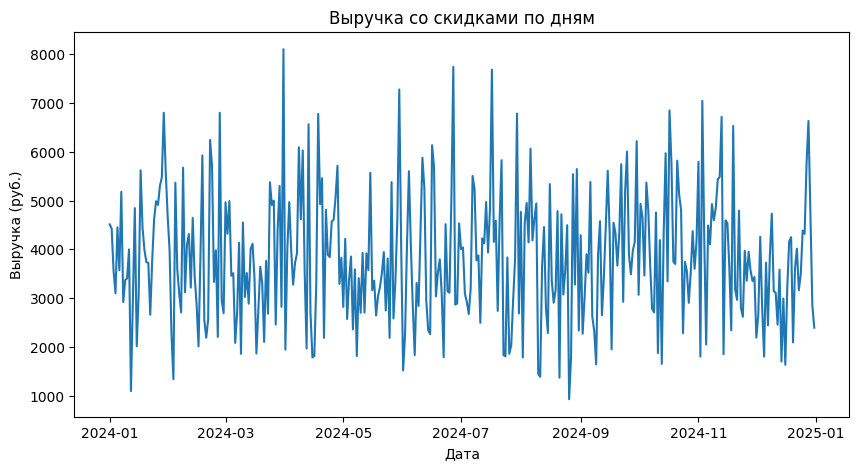

In [14]:
# Группировка выручки со скидками по дням
discount_revenue_by_day = discount_sales.groupby(discount_sales['sale_datetime'].dt.date)['Сумма (руб)'].sum()

# Построение графика
discount_revenue_by_day.plot(kind='line', title='Выручка со скидками по дням', xlabel='Дата', ylabel='Выручка (руб.)', figsize=(10, 5))
plt.show()

In [15]:
from itertools import combinations
from collections import Counter

# Группировка товаров по номеру чека
basket_data = data.groupby('НомерЧека')['Товар'].apply(list)

# Подсчёт комбинаций товаров
basket_combinations = Counter()
for basket in basket_data:
    basket_combinations.update(combinations(sorted(basket), 2))  # Пары товаров

# Топ-10 популярных комбинаций
top_combinations = basket_combinations.most_common(10)
print("\nТоп-10 популярных комбинаций товаров:")
for combo, count in top_combinations:
    print(f"{combo}: {count} раз(а)")



Топ-10 популярных комбинаций товаров:
('Лук репчатый', "Яблоки 'Белый налив'"): 417 раз(а)
('Бананы', 'Йогурт питьевой'): 410 раз(а)
('Бананы', 'Чай черный'): 387 раз(а)
('Морковь', 'Чай черный'): 383 раз(а)
('Морковь', "Сыр 'Российский'"): 380 раз(а)
('Йогурт питьевой', 'Чай черный'): 379 раз(а)
('Картофель', 'Кофе молотый'): 378 раз(а)
('Бананы', "Яблоки 'Белый налив'"): 375 раз(а)
('Картофель', 'Чай черный'): 373 раз(а)
('Кофе молотый', 'Лук репчатый'): 373 раз(а)


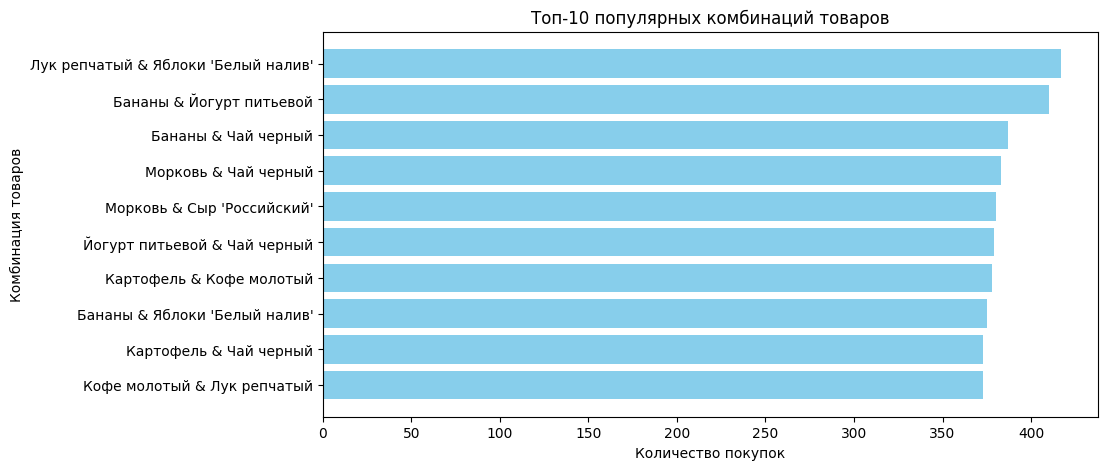

In [52]:

# Подготовка данных для графика
combo_names = [f"{a} & {b}" for (a, b), count in top_combinations]
combo_counts = [count for (a, b), count in top_combinations]

# Построение графика
plt.figure(figsize=(10, 5))
plt.barh(combo_names, combo_counts, color='skyblue')
plt.xlabel('Количество покупок')
plt.ylabel('Комбинация товаров')
plt.title('Топ-10 популярных комбинаций товаров')
plt.gca().invert_yaxis()  # Инвертируем ось Y для удобства
plt.show()
